# [실습] 단변량분석 종합실습

## 0.환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 변수

## 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [3]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

crim  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  zn2  
0  396.90   4.98  24.0    1  
1  396.90   9.14  21.6    0  
2  392.83   4.03  34.7    0  
3  394.63   2.94  33.4    0  
4  396.90   5.33  36.2    0

### ① crim

In [4]:
var= 'crim'

1) 변수의 비즈니스 의미

> 타운별 범죄율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [5]:
boston[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [6]:
boston[var].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [ ]:
boston[var].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

5) 분포 확인(시각화)

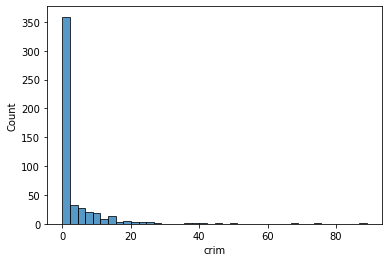

In [ ]:
sns.histplot(boston[var], bins = 40)
plt.show()

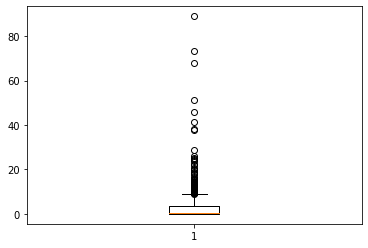

[0.082045 0.00632 ]
[3.6770825 8.98296  ]


In [ ]:
box = plt.boxplot(boston[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분(75%의 타운)의 범죄율이 3.6% 이하  
* boxlplot 기준으로 볼 때, 약 9% 이상은 이상치로 검토
* 대부분의 타운은 치안 관리가 잘 되는 것 같으나, 9% 이상의 범죄율 지역은 치안상태, 외곽지역, 슬럼가/빈곤층 밀집 지역 등인지 확인이 필요하다.

7) 추가 분석해 볼 사항이 있나요?

> * 범죄율을 9% 이상과 이하로 나누고(범주화), 이상인 지역과 이하의 지역에 대한 다른 변수의 차이를 비교해 본다.

### ② ptratio

In [7]:
var = 'ptratio'

1) 변수의 비즈니스 의미

* 학생/교사 비율

2) 숫자, 범주?

In [ ]:
type(boston[var])

3) NaN 존재 유무

In [10]:
boston[var].isna().sum()

0

4) 기초통계량(수치화)

In [11]:
boston[var].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

5) 분포 확인(시각화)

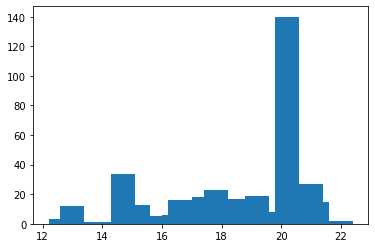

In [19]:
cnt = pd.Series(boston[var])
cnt = cnt.value_counts()
plt.bar(cnt.index, cnt.values)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균치와 1사분위수가 비슷한 것을 보아 대부분 지역의 학생/선생 비율이 평균을 웃도는 것을 알 수 있다.
* 그러나 그렇지 못한 비율을 가진 지역도 있기에, 정부차원에서 교사의 비율을 늘릴 필요가 있다

7) 추가 분석해 볼 사항이 있나요?

* 20%에 타운이 몰려 있는 것으로 보아, 교사학생 비율에 대한 정책적인 기준이 있는것으로 판단됨

* 교사학생비율에 따른 집값의 차이는?

### ③ lstat

In [20]:
var = 'lstat'

1) 변수의 비즈니스 의미

* 인구 중 하위 계층 비율

2) 숫자, 범주?

In [31]:
type(boston[var])

pandas.core.series.Series

3) NaN 존재 유무

In [22]:
boston[var].isna().sum()

0

4) 기초통계량(수치화)

In [23]:
boston[var].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

5) 분포 확인(시각화)

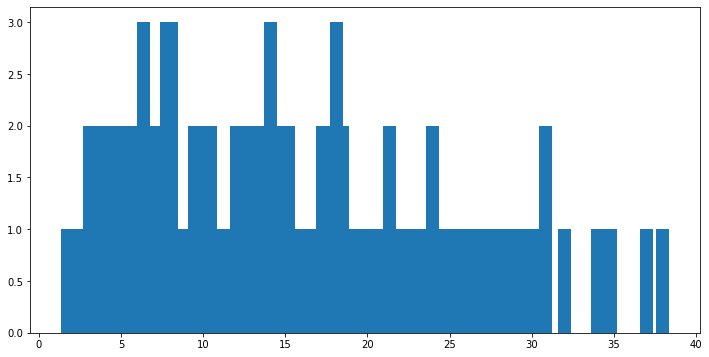

In [28]:
cnt = pd.Series(boston[var])
cnt = cnt.value_counts()
plt.figure(figsize=(12, 6))
plt.bar(cnt.index, cnt.values)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 지역별 하위계층 비율이 극단적으로 높은 지역은 없음을 알 수 있다

7) 추가 분석해 볼 사항이 있나요?

* 하위계층 비율과 집값의 관계는?

### ④ medv

In [66]:
var = 'medv'

1) 변수의 비즈니스 의미

* 타운별 집값(중위수)

2) 숫자, 범주?

In [67]:
type(boston[var])

pandas.core.series.Series

3) NaN 존재 유무

In [68]:
boston[var].isna().sum()

0

4) 기초통계량(수치화)

In [69]:
boston[var].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

5) 분포 확인(시각화)

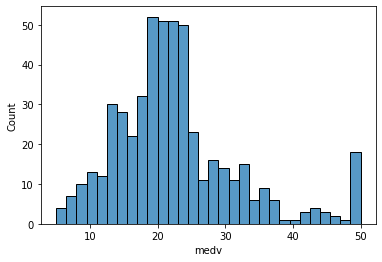

In [70]:
# cnt = pd.Series(boston[var])
# cnt = cnt.value_counts()
# plt.figure(figsize=(12, 6))
# plt.bar(cnt.index, cnt.values)
# plt.show()

sns.histplot(boston[var], bins=30)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 극단적으로 높은 집값을 가진 지역이 하나 있으며, 대부분의 타운별 집값은 10 ~ 30 수준에 위치하는 것을 알 수 있다.
* 50위치에 있는 데이터는 무엇을 뜻할까?
    * 분포가 그렇게 생긴 데에는 다 이유(비즈니스 이유)가 있다

7) 추가 분석해 볼 사항이 있나요?

# 범주형 변수

## 타이타닉 탑승객 데이터

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [36]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### ① Survived

In [37]:
var = 'Survived'

1) 변수의 비즈니스 의미

> 탑승객의 생존여부

2) 숫자, 범주?

In [38]:
titanic[var].unique()

array([0, 1], dtype=int64)

> * 범주형 데이터
* 범주 종류 1, 0
    * 1: 생존
    * 0: 사망

3) NaN 존재 유무

In [39]:
titanic[var].isna().sum()

0

> NA 없음

4) 기초통계량(수치화)

In [40]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


5) 분포 확인(시각화)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


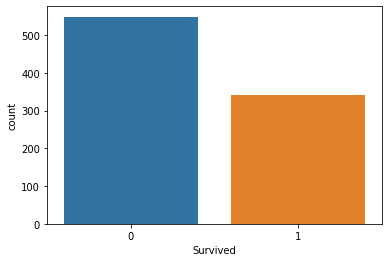

In [ ]:
sns.countplot(titanic[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 891명
* 생존자
    * 생존자의 수는 342명
    * 생존율 0.384
* 사망율이 높은 이유는 무엇일까?

7) 추가 분석해 볼 사항이 있나요?

> * Survived가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② Pclass	

In [41]:
var = 'Pclass'

1) 변수의 비즈니스 의미

* 티켓 등급

2) 숫자, 범주?

In [42]:
titanic[var].unique()

array([3, 1, 2], dtype=int64)

3) NaN 존재 유무

In [43]:
titanic[var].isna().sum()

0

4) 기초통계량(수치화)

In [44]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

3    491
1    216
2    184
Name: Pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


5) 분포 확인(시각화)

3    491
1    216
2    184
Name: Pclass, dtype: int64


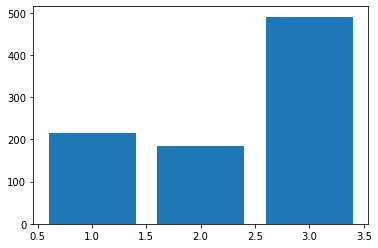

In [46]:
cnt = titanic[var].value_counts()
print(cnt)
plt.bar(cnt.index, cnt.values)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 3등급 티켓을 구매한 탑승객이 1,2등급 티켓을 구매한 탑승객의 수보다 많은 것을 알 수 있다.
* 탑승지역은 주로 2차산업혁명의 중심 도시 -> 아메리칸드림을 갖고 탑승한 노동자들이 주류 -> 3등급 객실에서 주로 탑승
    * 혹은 3등급이 최하위 등급일수도

7) 추가 분석해 볼 사항이 있나요?

* 티켓의 듭급과 생존자 수를 분석하여 티켓등급별 생존사의 비율을 분석해 볼 수 있을 것이다

### ③ Sex

In [47]:
var = 'Sex'

1) 변수의 비즈니스 의미

* 성별

2) 숫자, 범주?

In [48]:
titanic[var].unique()

array(['male', 'female'], dtype=object)

3) NaN 존재 유무

In [49]:
titanic[var].isna().sum()

0

4) 기초통계량(수치화)

In [50]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64


5) 분포 확인(시각화)

male      577
female    314
Name: Sex, dtype: int64


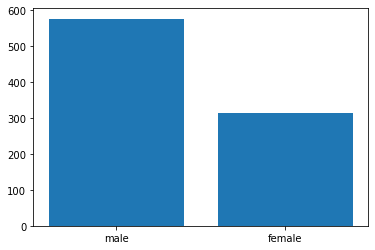

In [51]:
cnt = titanic[var].value_counts()
print(cnt)
plt.bar(cnt.index, cnt.values)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 탑승객들의 넘녀 성별의 비율은 남성이 64%로 여성보다 많은 것을 알 수 있다.

7) 추가 분석해 볼 사항이 있나요?

* 성별과 생존자의 상관관계를 분석하여 남녀비율중 어느 성별이 생존율이 높은지 분석할 수 있다.
* 이 외에 나이와 함께 조사하여 나이별 남녀 성비 또한 분석할 수 있다.

### ④ Embarked

In [72]:
var = 'Embarked'

1) 변수의 비즈니스 의미

* 승선지

2) 숫자, 범주?

In [73]:
titanic[var].unique()

array(['S', 'C', 'Q', nan], dtype=object)

3) NaN 존재 유무

In [74]:
print(titanic[var].isna().sum())
print(titanic[var].isna().sum()/len(titanic[var]))

2
0.002244668911335578


4) 기초통계량(수치화)

In [75]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


5) 분포 확인(시각화)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


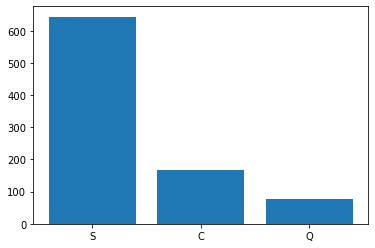

In [76]:
cnt = titanic[var].value_counts()
print(cnt)
plt.bar(cnt.index, cnt.values)
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* C = Cherbourg, Q = Queenstown, S = Southampton
    * C, Q => 2차 산업혁명의 중심지
    * S => 부촌

* 사우스햄튼에서 승선한 탑승객이 가장 많은 것을 알 수 있으며, 퀸즈타운에서 승선한 탑승객이 가장 적은 것을 알 수 있다.

7) 추가 분석해 볼 사항이 있나요?

* 승선지와 함께 분석해볼만한 데이터셋은 'Age', 'Pclass', 'ticket', 'Fare'등이 있으며
    * 승선지에 따른 탑승객들의 나이 분포
    * 승선지에 따른 탑승객들의 티켓 등급 비율
    * 승선지에 따른 탑승객들의 소비량 
    * 등 을 분석할 수 있겠다